# Introductory Notes: 
- master fundamentals first: most problems can be solved using simple techniques. Deep learning is best suited for complex problems such as image/speech recognition / NLP
- definitely do Andrew Ng's ML course on Coursera, deeplearning.ai course, deeplearning.net has good resources, maybe finish Dataquest
- check out page XX for good reads - in particular, Francois's /  
https://homl.info/patel
- once done with book, message author on linkedin (page xxiii) 



# The Machine Learning Landscape

- make sure everything is crystal clear by the end of this chapter
- "**Machine Learning is the science (and art) of programming computers so they can *learn from data*.**" 
- examples that system uses = training set (each instance called a sample) 
- can automatically notice changes and instantly adapt
- traditional programming: write rules | machine learning: train ML algorithm
- machine learning helps humans learn, too
- data mining: applying ML techniques to dig into large amounts of data, which helps discover hidden patterns 
- in short, ml is great for deriving solutions from complex problems / fluctuating environments 

## Types of ML Systems: 
- whether or not trained w/ human supervision (supervised, unsupervised, semisupervised, and Reinforcement Learning)
- whether or not they can learn incrementally on the fly (online versus batch learning) 
- whether they work by simply comparing new data to known data or instead by detecting patterns and building a predictive model (instance-based vs. model-based learning) 

## Supervised Learning: 
---
- Supervised learning: training set you feed to the algorithm includes the desired solutions (called labels) 
- a typical example of SL is classification / to predict a target numeric value given a set of features (mileage, age, brand, etc.) called predictors --> this task is called regression. <--> to train the system, you need to give it many examples of cars, including both their predictors and their labels (i.e., their prices)
- attribute = data type (e.g., "mileage") | feature usually means attribute + its value: (e.g, "mileage = 15,000") -> people use both interchangeably
- some regression algos can be used for classification as well, and vice versa, i.e. Logistic Regression
- **list of important supervised learning algorithms**: KNN, Linear Regression, Logistic Regression, Support Vector Machines (SVMs), Decision Trees/RFs, Neural Networks
---




## Unsupervised Learning:
---
- training data is UNLABELED (learns w/o a teacher) 
- important algorithms: Clustering, Anomaly Detection/Novelty Detection, Visualization & Dimensionality Reduction, Association Rule Learning
- i.e. classifying blog visitors: you never tell *it* who belongs to which groups, it forms its own --> clustering
- visualization: feed complex, unlabeled data -> outputs 2D/3D representation of data that can easily be plotted
- dimensionality reduction: goal --> simplify data w/o losing too much info | involves merging features that are strongly correlated w/ one another (extraction) --> good to do before feeding data into another algo (makes it simpler/faster) 
- anomaly/novelty detection: captures outliers (i.e., credit card fraud) --> fed normal data during training, then it can tell whether something is normal or an anomaly
- Association Rule Learning: dig into large amounts of data to find hidden relations (i.e., people who buy bbq sauce and chips tend to buy steak... hmm, maybe place them all together in the store to generate more revenue
---


## Semisupervised Learning: 
---
- some algorithms can deal with (training) data that is partially labeled 
- i.e. if person A shows up in pictures 1, 4, and 7, give person A a name (a label) in any one of the pictures and it will automatically associate across all pictures
- Semisupervised Learning Algorithms are generally combinations of Sup/Unsup Models (RBMS) 
---

## Reinforcement Learning: 
---
- very different beast; learning system called an "agent"
- performs actions, receives rewards or penalities, chooses optimal policy based on outcome (reward or penality) 
--- 

## Batch Learning
--- 
- cannot be trained incrementally: requires use of ALL training data
- uses lots of resources, done offline
- not the best for constantly changing data / huge huge data
--- 
## Online Learning
--- 
- train system incrementally by feeding data instances sequentially (mini-batches) 
- each step is fast and cheap | learns new data on the fly 
- great for flowing, continuous data (i.e., stock prices) 
- once it has learned new instances, it does not NEED them anymore
- good for massive amounts of data (doing a little at a time) --> called out-of-core learning if data cannot fit on computer all at once
- LEARNING RATE = how fast system should adapt to changing data | too high --> learns fast, but forgets old data | too slow --> opposite
- CHALLENGE: bad data leads to decline of system (important to monitor input data) (AKA: using an Anomaly Detection Algorithm) 
--- 

## Instance-Based Learning: 
---
- ML systems can be categorized by how they *generalize* 
- generalize = make good predictions off training examples for new, unseen data
- "the goal is to perform well on NEW instances, not just training data" 
- Instance-Based: learns examples by heart then generalizes to new cases by examining similarities between new data and old data 
- compares new problem instances with instances seen in training data, instead of performing explicit generalization
--- 
## Model-Based Learning: 
- use model to make predictions based on similarity examples
- noisy data = partly random
- i.e. selecting a linear model to represent a relationship
- where all the assumptions about the problem domain are made explicit in the form of a model

### Linear Regression: 
- people typically use cost function (measures how bad model is) --> measures distance between predictions and training data; the objective is to minimize the distance  
- must define parameter values (θs) 
- training a model: running algorithm to find best parameters
---



# Example 1-1. Training and running a linear model using Scikit-Learn


"This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book." 

In [0]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [0]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [0]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
# Download the data
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

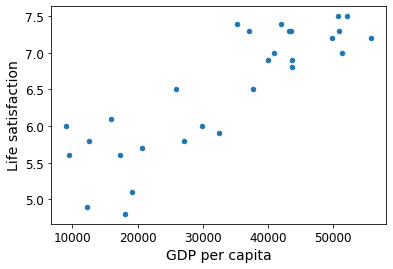

[[5.96242338]]


In [0]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data 
# Training data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
# Trained it on the training data (i.e., the learning algo. searched for the model parameter values that minimize a cost function)
model.fit(X, y)

# Make a prediction for Cyprus
# Applied model to make prediction on new cases (this is called inference) hoping the model would generalize well
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

---
- If I had used an instance-based learning algo, it would have found that Slovenia has the closest GDP to Cyprus's, and since Slovenia's life satisfaction is 5.7, my model would have predicted Cyprus's life satisfaction to be 5.7 as well. 
---

In [0]:
# Replacing Linear Regression model w/ K-Nearest Neighbors Regression

import sklearn.neighbors

# Select a linear model
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[5.76666667]]

[[5.76666667]]


# Main Challengies of Machine Learning

- In short, 2 things can go wrong: bad algorithm or bad data
--- 
## Insufficient Quantity of Training Data:
- oftentimes need thousands/millions of examples
- famous paper (https://homl.info/6) --> showed that very different ML algorithms (both simple and complex) performed almost identically well on a complex problem of natural language disambiguation once they were given ENOUGH DATA --> emphasizes importance of a good training set
--- 
## Nonrepresentative Training Data:
- training data should be representative of desired new cases | true for both instance/model bl
- above, in our happiness prediction model, we used nonrepresentative training data - left out countries, that, when added back in, significantly alter the model (slope of line) (rich countries are not happier than moderately rich countries/even some poor countries) - such could never be predicted with the data we used, therefore making it nonrepresentative
- if the sample it too small, we will have *sampling noise* (nonrepresentative data as a result of chance) | if the sample is too big, we have *sampling bias* (favors some outcomes over the others.. aka method is flawed) 
- example of sampling bias: saying that a candidate is favored to win based on a study, but said study was not representative of the general population 
---
## Poor Quality Data:   
- if some instances are outliers, consider discarding them 
- critical part of success in machine learning project is coming up with a good set of features to train on *feature engineering* --> *feature selection* select most useful features | *feature extraction* combining features to form more useful ones | & creating new features from gathering new data
---


Now let's look at some algorithmic errors

---
## Overfitting the Training Data: 
- model performs well on training data, but does not generalize well
- overfitting happens when the model is too complex relative to the amount and noisiness of the training data (can often happen with too little training data: model will pay attention to ridiculous things it thinks are relevant because too little data to say otherwise) 
- **How to deal with overfitting:** simplify model (called *regularization*) (select one with fewer parameters), gather more training data, or reduce noise (fix errors/remove outliers) 
- ***you want to find the balance between fitting the training data and generalizing well***
- regularization (simplifying model) can be as simple as changing the slope θ in our linear regression model --> the amount of regularization can be controlled by a *hyperparameter* --> **must be set prior to training** (very lage hyperparameter would not overfit data, but it would be almost flat) 
- a *hyperparameter* controls the learning process of the algorithm (not model) 
- *parameters* (node weights) are learned and are used to make predictions 
--- 
## Underfitting the Training Data:
- model is too simple to learn the underlying structure of the data
- to fix: select more powerful model, perform feature engineering, reduce constraints (reduce regularization hyperparameter) 
---

# Testing and Validating: 
- split data into two sets: training and test
- the error rate on new cases is called *generalization error* (or *out-of-sample error*) 
- common to use 80% of data for training, 20% for testing, but be reasonable
--- 
## Hyperparameter Tuning / Model Selection: 
- *validation set/dev set/development set* is for tuning parameters, test set is for generalization evaluation 
- **more specifically**, you train multiple models with various hyperparameters on a reduced training set and you select the model that performs best --> after this *holdout validation* process, you train the best model on the full training set, which gives you your final model. Then, you evaluate this model on the test set toi get an estimate fo the generalization error
- repeated *cross-validation*: using many small validation sets --> this is more accurate, but takes longer (essentilly averages out evaluations of a model) 
- validation and test sets should be extremely representative of the new data we want to be able to accurately generalize
---


# Exercises: 
--- 
**KEY:**

a) my initial response

b) anything I left out/got wrong

--- 
1) Machine learning is training a model using data to generalize and make predictions on new data without explicitly programming code rules

*learn from data | learning = get better at a task*

--- 

2) Machine learning shines on image classification, sentiment analysis, deriving results from fluctuating environments, and discovering hidden patterns that humans would otherwise not be able to detect (i.e., *dating mining*)

*complex problems for which we have no algorithmic solution* 

--- 

3) A labeled training set is one that includes the feature we want to make the generalization about

*the desired solution (label) for each instance* 

--- 

4) Two most common types of supervised learning tasks: classification & predicting a numeric value (regression)

*classification & regression*

--- 

5) Four common unsupervised learning tasks: customer segmentation (clustering), credit card fraud (anomaly/novelty detection), simplifying data w/o losing too much info (visualization & dimensionality reduction), and finding hidden patterns/correlations within data (association rule learning)

*clustering, visualization, dimensionality reduction, and association rule learning*

--- 

6) To allow a robot to walk in various unknown terrains, I would use Reinforcement Learning

*reinforcement learning | may be possible to classify as supervsed/semisupervised*

--- 

7) For customer segmentation, I would use clustering (unsupervised learning) 

*if you don't know the groups you'd like --> go clustering | if you do know the groups you'd like --> feed many examples of each group to a classification algorithm (supervised learning) and it will classify all your customers into the desired groups (hopefully lol)* 

--- 

8) Spam detection is supervised learning because you would be training your model to classify emails as "spam" or "ham" by showing it examples of "spam" or "ham" (labels in training set, so supervised) 

*spam detection is a typical supervised learning problem*

--- 

9) an online learning system, as opposed to a batch learning system, learns incrementally by feeding *it* portions of dataset --> better/faster for handling larger datasets

*can also adapt rapidly to changing data and autonomous systems* 

--- 

10) out-of-core learning, otherwise known as batch learning, is the opposite of online learning, where it cannot learn incrementally and is instead fed the entire training data at once, which is generally hard to process, hence why it is performed offline; it can take a very long time 

*out-of-core algorithms can handle vast quantities of data that cannot fit in a computer's main memory. OFC algorithms chops the data into mini-batches and uses online learning techniques to learn from them --> this is NOT batch learning, which I confused above.*

--- 

11) Instance-based learning relies on a similarity measure to make predictions.

*learns training data by heart, uses most similar learned instances to predict new instances*

--- 

12) a model parameter (node weight) affects how the MODEL makes predictions (how it generalizes), whereas a learning algorithm hyperparameter adjusts the generalization performance of the LEARNING ALGORITHM --> tuning hyperparameters commonly performed using cross-validation (aka taking multiple datasets from the training data to use as validation/dev/devlopment sets) 

*a learning algorithm tries to find optimal values for parameters such that the model generalizes well to new instances*

--- 

13) Model based learning algorithms search for similarities and make predictions using models. 

*model based learning algorithms search for optimal model parameters --> we usually train such systems by trying to minimize the cost function*

--- 

14) The four main challenges of machine learning: unrepresentative data, poor quality data, overfitting the data, and underfitting the data

*lack of data, excessively simple models that underfit the training data, and excessively complex models that overfit the training data* 

--- 

15) When your model performs great on the training data but generalizes poorly to new instances, overfitting is occuring. As a fix, one should try to: gather new data, try constraining (simplifying) the model (regularization, aka tuning hyperparameters), or reduce noise (remove outliers/fix errors) 

*simplifying the model includes: selecting a simpler algorithm (or) reducing the numbers of parameters/features used (or) regularizing the model* 

--- 

16) A test set is usually a smaller portion of the collective data that is set aside to evluate the model for errors once it has been validated/tuned and trained. A model's performance on a test set is a good indicator of how it would generalize new data. 

*measures generalization error before it is launched into production*

--- 

17) A validation set is a smaller portion of the training data used to tune the learning algorithm's hyperparameters in order for it to learn optimally. 

*used to compare models | makes it possible to select the best model and tune the hyperparameters*

--- 

18) The train-dev set, otherwise known as the validation set, is used for validation before training the model with the entirety of the training data. You use it to tune the learning algorithm's hyperparameters. 


*NOT the same as validation set --> in fact, the train-dev set is data set aside from the training set that checks to see if there is **data mismatch** between the validation set/test set & training set. If the model performs well on the training set but not the train-dev set, then the model is likely overfitting the training set. If the model performs well on the training set & dev set, BUT NOT the validation set, then there is data mismatch between the training set & the validation/test set.* --> keep in mind: validation set is supposed to be as similar to test set as possible (or well, the data we want to generalize) 

--- 

19) 

==================== **REGARDING VALIDATION / HYPERPARAMETERS:** ====================

"***The idea behind holdout and cross validation is to estimate the generalization performance of a learning algorithm***--that is, the expected performance on unknown/unseen data drawn from the same distribution as the training data. This can be used to tune hyperparameters or report the final performance. ***The validity of this estimate depends on the independence of the data used for training and estimating performance***. If this independence is violated, the performance estimate will be overoptimistically biased. The most egregious way this can happen is by estimating performance on data that has already been used for training or hyperpameter tuning, but there are many more subtle and insidious ways too.

DO NOT USE VALIDATION SET FOR TRAINING. The goal of hyperparameter tuning is to select hyperparameters that will give good generalization performance. Typically, this works by estimating the generalization performance for different choices of hyperparameters (e.g. using a validation set), and then choosing the best. ***But, as above, this estimate will be overoptimistic if the same data has been used for training***. The consequence is that sub-optimal hyperparameters will be chosen. In particular, there will be a bias toward high capacity models that will overfit.

Second, data that has already been used to tune hyperparameters and is re-used to estimate performance (training) is BAD. This will give a deceptive estimate, as above. This isn't overfitting itself but it means that, if overfitting is happening (and it probably is, as above), then you won't know it.

The remedy is to use three separate datasets: a training set for training, a validation set for hyperparameter tuning, and a test set for estimating the final performance. Or, use nested cross validation, which will give better estimates, and is necessary if there isn't enough data."

My guess is overfitting..

*If you tune hyperparameters using the test set, you risk overfitting the test set, and therefore guiding the model to perform inaccurate generalizations on truly new data*

--- 

End of Chapter 1. I feel great right now... I've never felt more on track or motivated. I feel like I am finally learning and getting somewhere. Sure, I don't have much to show for it, but what's the rush? The knowledge I am gaining and cementing in my mind is invaluable. Not to mention, reading is great.